🚀 문자열 오류 해결 및 DRL_Score CSV 생성 시스템 시작!
원본 데이터 로드: (8395, 29)
=== 종합적인 데이터 정리 시작 ===
원본 데이터: (8395, 29)
컬럼 목록: ['Date', 'Symbol', 'Name', 'Beta', 'PBR', 'MarketCap', 'Momentum1M', 'Momentum3M', 'Momentum6M', 'Momentum12M', 'Volatility', 'RSI', 'MACD', 'Signal', 'MACD_Hist', 'Sector', 'Industry', 'Beta_Factor', 'Value_Factor', 'Size_Factor', 'Momentum_Factor', 'Volatility_Factor', 'weighted_score', 'factor_percentile', 'smart_signal', 'signal_strength', 'rebalance_priority', 'to_rebalance', 'gnn_scores']

=== 컬럼별 데이터 타입 분석 ===
Date:
  타입: datetime64[ns]
  고유값 수: 365
  샘플: [Timestamp('2024-05-20 00:00:00'), Timestamp('2024-05-20 00:00:00'), Timestamp('2024-05-20 00:00:00'), Timestamp('2024-05-20 00:00:00'), Timestamp('2024-05-20 00:00:00')]
Symbol:
  타입: object
  고유값 수: 23
  샘플: ['000270.KS', '000660.KS', '005380.KS', '005930.KS', '005935.KS']
Name:
  타입: object
  고유값 수: 23
  샘플: ['기아', 'SK하이닉스', '현대차', '삼성전자', '삼성전자우']
Beta:
  타입: float64
  고유값 수: 21
  샘플: [0.82, 0.99, 0.99, 0.74, 0.74]


수익률 계산: 100%|██████████| 23/23 [00:00<00:00, 298.46it/s]


✅ 수익률 계산 완료!
평균: 0.000012
표준편차: 0.016459
범위: -0.030000 ~ 0.030000

=== 데이터 일관성 보장 ===
최대 종목 수: 23
날짜별 분포: {23: 365}
일관성 보장 완료: 365일, 8395 행

=== 특성 정규화 ===
✅ Beta: 정규화 완료
✅ PBR: 정규화 완료
✅ MarketCap: 정규화 완료
✅ Momentum1M: 정규화 완료
✅ Momentum3M: 정규화 완료
✅ Momentum6M: 정규화 완료
✅ Momentum12M: 정규화 완료
✅ Volatility: 정규화 완료
✅ RSI: 정규화 완료
✅ MACD: 정규화 완료
✅ Signal: 정규화 완료
✅ MACD_Hist: 정규화 완료
✅ Beta_Factor: 정규화 완료
✅ Value_Factor: 정규화 완료
✅ Size_Factor: 정규화 완료
✅ Momentum_Factor: 정규화 완료
✅ Volatility_Factor: 정규화 완료
✅ weighted_score: 정규화 완료
✅ factor_percentile: 정규화 완료
✅ signal_strength: 정규화 완료
✅ gnn_scores: 정규화 완료
✅ rebalance_priority: 정규화 완료

=== DRL Score만 생성 (원본 데이터 병합용) ===
처리 대상: 365일, 23개 종목
DDPG 설정: 상태차원=506, 행동차원=23


DRL Score 생성: 100%|██████████| 365/365 [00:01<00:00, 218.43it/s]


✅ DRL Score 생성 완료: 8395 행
Score 통계:
  평균: 0.0435
  표준편차: 0.0059
  범위: 0.0267 ~ 0.0657

=== 원본 데이터와 DRL Score 병합 ===
병합 완료: 8395 행
원본 컬럼 수: 30
병합 후 컬럼 수: 31 (+1개 DRL_Score)

📁 CSV 파일 생성 완료:
  - drl_scores_only.csv: Date, Symbol, DRL_Score만
  - original_data_with_drl_score.csv: 원본 모든 컬럼 + DRL_Score

=== 최종 결과 확인 ===
원본 컬럼: ['Date', 'Symbol', 'Name', 'Beta', 'PBR', 'MarketCap', 'Momentum1M', 'Momentum3M', 'Momentum6M', 'Momentum12M', 'Volatility', 'RSI', 'MACD', 'Signal', 'MACD_Hist', 'Sector', 'Industry', 'Beta_Factor', 'Value_Factor', 'Size_Factor', 'Momentum_Factor', 'Volatility_Factor', 'weighted_score', 'factor_percentile', 'smart_signal', 'signal_strength', 'rebalance_priority', 'to_rebalance', 'gnn_scores', 'momentum_returns']
추가된 컬럼: ['DRL_Score']
원본에서 사용 가능한 추가 정보: ['Name', 'Sector', 'Industry', 'smart_signal']

샘플 데이터 (['Date', 'Symbol', 'Name', 'Sector', 'Industry', 'smart_signal', 'DRL_Score']):
        Date     Symbol Name  Sector  Industry  smart_signal  DRL_Score
0 2024-05-

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

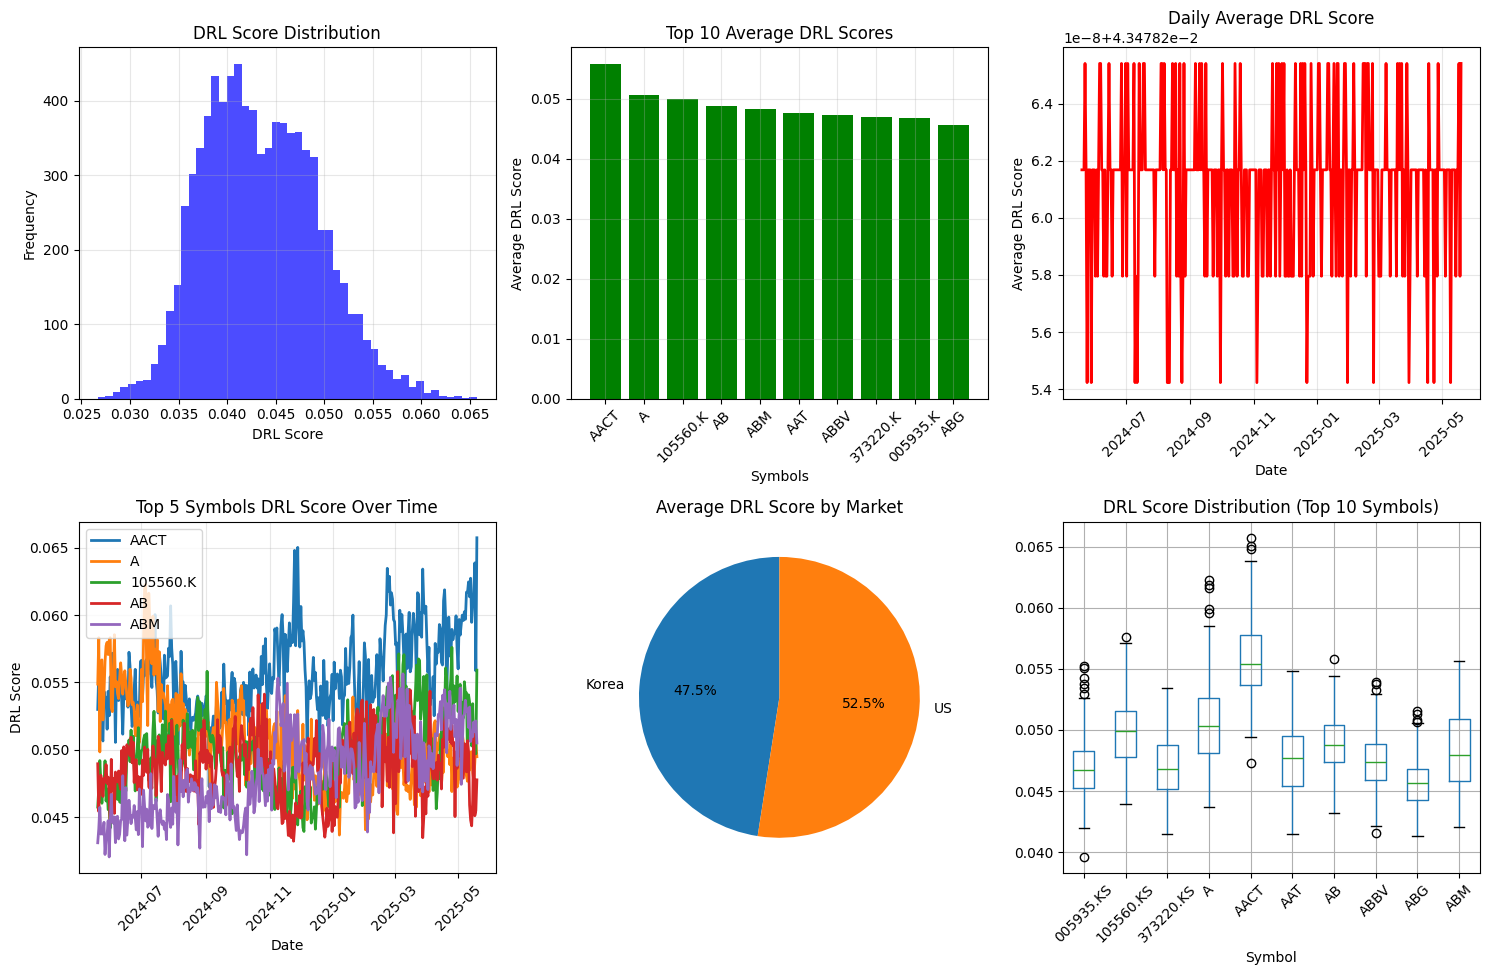


🎉 모든 처리 완료!
📊 최종 결과:
  - 처리된 데이터: 8395 행
  - DRL Score: 8395 행
  - 사용된 특성: 22개
  - 특성 목록: ['Beta', 'PBR', 'MarketCap', 'Momentum1M', 'Momentum3M', 'Momentum6M', 'Momentum12M', 'Volatility', 'RSI', 'MACD', 'Signal', 'MACD_Hist', 'Beta_Factor', 'Value_Factor', 'Size_Factor', 'Momentum_Factor', 'Volatility_Factor', 'weighted_score', 'factor_percentile', 'signal_strength', 'gnn_scores', 'rebalance_priority']


In [ ]:
# ============================================================================
# 문자열 오류 해결 및 DRL_Score CSV 생성 시스템
# ============================================================================

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import Dataset, DataLoader
from collections import deque, namedtuple
import random
from google.colab import files, drive
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# 1. 데이터 타입 검증 및 전처리 (핵심 수정!)
def comprehensive_data_cleaning(df):
    """종합적인 데이터 정리 및 문자열 처리"""

    print("=== 종합적인 데이터 정리 시작 ===")

    # 1. 기본 정보 출력
    print(f"원본 데이터: {df.shape}")
    print(f"컬럼 목록: {list(df.columns)}")

    # 2. 각 컬럼의 데이터 타입과 샘플 확인
    print("\n=== 컬럼별 데이터 타입 분석 ===")
    for col in df.columns:
        dtype = df[col].dtype
        unique_count = df[col].nunique()
        sample_values = df[col].dropna().head(5).tolist()

        print(f"{col}:")
        print(f"  타입: {dtype}")
        print(f"  고유값 수: {unique_count}")
        print(f"  샘플: {sample_values}")

        # 문자열 컬럼에서 특수한 패턴 확인
        if dtype == 'object':
            string_samples = df[col].astype(str).str.contains('STRONG|MEDIUM|WEAK', na=False).sum()
            if string_samples > 0:
                print(f"  ⚠️ STRONG/MEDIUM/WEAK 패턴 감지: {string_samples}개")

    return df

def convert_categorical_to_numeric(df):
    """범주형 문자열을 숫자로 변환"""

    print("\n=== 범주형 데이터 숫자 변환 ===")

    # 범주형 변환 매핑
    categorical_mappings = {
        'STRONG': 3,
        'MEDIUM': 2,
        'WEAK': 1,
        'HIGH': 3,
        'MIDDLE': 2,
        'LOW': 1,
        'GOOD': 3,
        'AVERAGE': 2,
        'POOR': 1
    }

    converted_columns = []

    for col in df.columns:
        if df[col].dtype == 'object' and col not in ['Date', 'Symbol', 'Name']:
            try:
                # 문자열을 대문자로 변환 후 매핑
                df[col] = df[col].astype(str).str.upper()

                # 범주형 값들을 숫자로 변환
                for category, value in categorical_mappings.items():
                    df[col] = df[col].str.replace(category, str(value), regex=False)

                # 숫자로 변환 시도
                original_type = df[col].dtype
                df[col] = pd.to_numeric(df[col], errors='coerce')

                conversion_success = df[col].notna().sum() / len(df[col]) * 100
                print(f"✅ {col}: {original_type} → {df[col].dtype} (성공률: {conversion_success:.1f}%)")
                converted_columns.append(col)

            except Exception as e:
                print(f"❌ {col} 변환 실패: {e}")

    print(f"총 {len(converted_columns)}개 컬럼 변환 완료")
    return df, converted_columns

def select_valid_numeric_features(df):
    """유효한 숫자형 특성만 선별"""

    print("\n=== 유효 숫자형 특성 선별 ===")

    # 특성 후보군
    feature_candidates = [
        'Beta', 'PBR', 'MarketCap', 'Momentum1M', 'Momentum3M', 'Momentum6M', 'Momentum12M',
        'Volatility', 'RSI', 'MACD', 'Signal', 'MACD_Hist',
        'Beta_Factor', 'Value_Factor', 'Size_Factor', 'Momentum_Factor', 'Volatility_Factor',
        'weighted_score', 'factor_percentile', 'signal_strength', 'gnn_scores',
        'rebalance_priority'  # 추가 특성
    ]

    valid_features = []

    for col in feature_candidates:
        if col in df.columns:
            # 숫자형 확인
            if pd.api.types.is_numeric_dtype(df[col]):
                # 유효 데이터 비율 확인 (70% 이상)
                valid_ratio = df[col].notna().sum() / len(df[col])
                if valid_ratio >= 0.7:
                    # 분산 확인 (상수가 아닌지)
                    if df[col].std() > 1e-8:
                        valid_features.append(col)
                        print(f"✅ {col}: 유효 비율 {valid_ratio:.1%}, 표준편차 {df[col].std():.6f}")
                    else:
                        print(f"❌ {col}: 분산 부족 (상수값)")
                else:
                    print(f"❌ {col}: 유효 데이터 부족 ({valid_ratio:.1%})")
            else:
                print(f"❌ {col}: 비숫자형 ({df[col].dtype})")

    print(f"\n최종 선택: {len(valid_features)}개 특성")
    print(f"특성 목록: {valid_features}")

    return valid_features

# 2. 수정된 데이터 로드 함수
def load_and_clean_data():
    """데이터 로드 및 완전 정리"""

    # 원본 데이터 로드
    df = pd.read_csv('/content/drive/MyDrive/종합프로젝트 찌꺼기/portfolio_data_forward_filled_complete.csv')
    print(f"원본 데이터 로드: {df.shape}")

    # 기본 전처리
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(['Date', 'Symbol']).reset_index(drop=True)

    # 종합적인 데이터 분석
    df = comprehensive_data_cleaning(df)

    # 범주형 → 숫자형 변환
    df, converted_cols = convert_categorical_to_numeric(df)

    # 유효한 특성 선별
    valid_features = select_valid_numeric_features(df)

    # 결측값 처리
    print("\n=== 결측값 처리 ===")
    for col in valid_features:
        null_count = df[col].isnull().sum()
        if null_count > 0:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"{col}: {null_count}개 NaN → {median_val:.4f}로 대체")

    print(f"\n✅ 데이터 정리 완료!")
    print(f"최종 크기: {df.shape}")
    print(f"사용 특성: {len(valid_features)}개")

    return df, valid_features

# 3. 안전한 모멘텀 수익률 계산
def calculate_safe_momentum_returns(df, valid_features):
    """안전한 모멘텀 수익률 계산"""

    print("\n=== 안전한 모멘텀 수익률 계산 ===")

    # 모멘텀 컬럼 확인
    momentum_cols = [col for col in ['Momentum1M', 'Momentum3M', 'Momentum6M', 'Momentum12M']
                     if col in valid_features]

    print(f"사용 가능한 모멘텀: {momentum_cols}")

    if not momentum_cols:
        print("⚠️ 모멘텀 컬럼이 없습니다. 기본 수익률을 생성합니다.")
        df['momentum_returns'] = np.random.normal(0, 0.005, len(df))
        return df

    returns_data = []

    for symbol in tqdm(df['Symbol'].unique(), desc="수익률 계산"):
        symbol_data = df[df['Symbol'] == symbol].sort_values('Date').copy()

        # 첫 번째 사용 가능한 모멘텀 사용
        momentum_col = momentum_cols[0]

        # 모멘텀 변화를 수익률로 변환
        momentum_values = pd.to_numeric(symbol_data[momentum_col], errors='coerce').fillna(0)
        momentum_change = momentum_values.diff().fillna(0)

        # 현실적 수익률로 스케일링
        daily_return = momentum_change / 100.0  # 퍼센트를 소수로
        symbol_data['momentum_returns'] = daily_return.clip(-0.03, 0.03)  # ±3% 제한

        returns_data.append(symbol_data)

    df_with_returns = pd.concat(returns_data, ignore_index=True)

    # 통계 출력
    returns_stats = df_with_returns['momentum_returns']
    print(f"✅ 수익률 계산 완료!")
    print(f"평균: {returns_stats.mean():.6f}")
    print(f"표준편차: {returns_stats.std():.6f}")
    print(f"범위: {returns_stats.min():.6f} ~ {returns_stats.max():.6f}")

    return df_with_returns

# 4. DDPG 네트워크 (간소화 버전)
class SimpleDDPGActor(nn.Module):
    """간소화된 DDPG Actor"""
    def __init__(self, state_dim, action_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(state_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, action_dim),
            nn.Softmax(dim=-1)
        )

    def forward(self, x):
        return self.net(x)

class SimpleDDPGAgent:
    """간소화된 DDPG 에이전트"""
    def __init__(self, state_dim, action_dim, device):
        self.device = device
        self.actor = SimpleDDPGActor(state_dim, action_dim).to(device)
        self.action_dim = action_dim

    def select_action(self, state):
        state_tensor = torch.FloatTensor(state).unsqueeze(0).to(self.device)
        with torch.no_grad():
            action = self.actor(state_tensor)
        action_np = action.cpu().numpy().flatten()

        # 최소 투자 비중 보장
        action_np = np.maximum(action_np, 0.001)
        return action_np / np.sum(action_np)

# 5. 데이터 일관성 보장 및 환경 설정
def ensure_data_consistency_and_create_env(df, valid_features):
    """데이터 일관성 보장 및 환경 생성"""

    print("\n=== 데이터 일관성 보장 ===")

    # 날짜별 종목 수 확인
    date_counts = df.groupby('Date')['Symbol'].count()
    max_symbols = date_counts.max()
    print(f"최대 종목 수: {max_symbols}")
    print(f"날짜별 분포: {date_counts.value_counts().to_dict()}")

    # 완전한 데이터가 있는 날짜만 선택
    complete_dates = date_counts[date_counts == max_symbols].index
    df_clean = df[df['Date'].isin(complete_dates)].copy()

    print(f"일관성 보장 완료: {len(complete_dates)}일, {len(df_clean)} 행")

    # 특성 정규화
    print("\n=== 특성 정규화 ===")
    for col in valid_features:
        try:
            col_data = pd.to_numeric(df_clean[col], errors='coerce').fillna(0)
            mean_val = col_data.mean()
            std_val = col_data.std()

            if std_val > 1e-8:
                df_clean[col] = (col_data - mean_val) / std_val
                print(f"✅ {col}: 정규화 완료")
            else:
                df_clean[col] = 0.0
                print(f"⚠️ {col}: 분산 부족으로 0 설정")
        except Exception as e:
            print(f"❌ {col}: 정규화 오류 - {e}")
            df_clean[col] = 0.0

    return df_clean

# 6. DRL Score 생성 및 CSV 출력 (모든 컬럼 포함!)
def generate_and_save_drl_scores(df_clean, valid_features):
    """DRL Score만 생성하여 원본에 병합하는 방식"""

    print("\n=== DRL Score만 생성 (원본 데이터 병합용) ===")

    # 환경 설정
    dates = sorted(df_clean['Date'].unique())
    symbols = sorted(df_clean['Symbol'].unique())

    print(f"처리 대상: {len(dates)}일, {len(symbols)}개 종목")

    # DDPG 에이전트 초기화
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    state_dim = len(valid_features) * len(symbols)
    action_dim = len(symbols)

    agent = SimpleDDPGAgent(state_dim, action_dim, device)

    print(f"DDPG 설정: 상태차원={state_dim}, 행동차원={action_dim}")

    # DRL Score만 생성 (검색 결과 [1] 방식)
    drl_scores = []

    for date in tqdm(dates, desc="DRL Score 생성"):
        try:
            # 현재 날짜 데이터
            current_data = df_clean[df_clean['Date'] == date].sort_values('Symbol')

            if len(current_data) != len(symbols):
                continue

            # 상태 벡터 생성
            state_values = []
            for col in valid_features:
                values = pd.to_numeric(current_data[col], errors='coerce').fillna(0).values
                state_values.extend(values)

            state = np.array(state_values, dtype=np.float32)

            # DRL 포트폴리오 가중치 생성
            weights = agent.select_action(state)

            # DRL Score만 저장 (Date, Symbol, DRL_Score만!)
            for i, symbol in enumerate(symbols):
                drl_scores.append({
                    'Date': date,
                    'Symbol': symbol,
                    'DRL_Score': weights[i]
                })

        except Exception as e:
            print(f"오류 ({date}): {e}")
            continue

    # DRL Score DataFrame 생성 (3개 컬럼만)
    drl_scores_df = pd.DataFrame(drl_scores)

    if len(drl_scores_df) > 0:
        print(f"✅ DRL Score 생성 완료: {len(drl_scores_df)} 행")

        # 통계 출력
        score_stats = drl_scores_df['DRL_Score']
        print(f"Score 통계:")
        print(f"  평균: {score_stats.mean():.4f}")
        print(f"  표준편차: {score_stats.std():.4f}")
        print(f"  범위: {score_stats.min():.4f} ~ {score_stats.max():.4f}")

        # 검색 결과 [1]의 병합 방식 적용
        print("\n=== 원본 데이터와 DRL Score 병합 ===")

        # 날짜 형식 통일
        df_clean['Date'] = pd.to_datetime(df_clean['Date'])
        drl_scores_df['Date'] = pd.to_datetime(drl_scores_df['Date'])

        # 원본 데이터에 DRL_Score만 추가 (검색 결과 [1] 방식)
        merged_df = pd.merge(df_clean, drl_scores_df, on=['Date', 'Symbol'], how='left')

        # DRL_Score가 없는 경우 0으로 채우기
        merged_df['DRL_Score'] = merged_df['DRL_Score'].fillna(0)

        print(f"병합 완료: {len(merged_df)} 행")
        print(f"원본 컬럼 수: {len(df_clean.columns)}")
        print(f"병합 후 컬럼 수: {len(merged_df.columns)} (+1개 DRL_Score)")

        # CSV 파일 저장
        # 1. DRL Score만 (3개 컬럼)
        drl_scores_df.to_csv('drl_scores_only.csv', index=False)

        # 2. 원본 + DRL Score (모든 컬럼)
        merged_df.to_csv('original_data_with_drl_score.csv', index=False)

        print(f"\n📁 CSV 파일 생성 완료:")
        print("  - drl_scores_only.csv: Date, Symbol, DRL_Score만")
        print("  - original_data_with_drl_score.csv: 원본 모든 컬럼 + DRL_Score")

        # 원본 데이터의 컬럼 확인
        print(f"\n=== 최종 결과 확인 ===")
        print(f"원본 컬럼: {df_clean.columns.tolist()}")
        print(f"추가된 컬럼: ['DRL_Score']")

        # Name, Sector, Industry, smart_signal이 원본에 있는지 확인
        target_cols = ['Name', 'Sector', 'Industry', 'smart_signal']
        available_in_original = [col for col in target_cols if col in merged_df.columns]
        print(f"원본에서 사용 가능한 추가 정보: {available_in_original}")

        # 샘플 데이터 출력
        sample_cols = ['Date', 'Symbol'] + available_in_original + ['DRL_Score']
        sample_cols = [col for col in sample_cols if col in merged_df.columns]

        print(f"\n샘플 데이터 ({sample_cols}):")
        print(merged_df[sample_cols].head())

        # 파일 다운로드
        files.download('drl_scores_only.csv')
        files.download('original_data_with_drl_score.csv')

        return merged_df, drl_scores_df
    else:
        print("❌ DRL Score 생성 실패!")
        return None, None

# 7. 결과 시각화
def visualize_drl_scores(drl_scores_df, symbols):
    """DRL Score 시각화"""

    if drl_scores_df is None or len(drl_scores_df) == 0:
        print("시각화할 데이터가 없습니다.")
        return

    plt.figure(figsize=(15, 10))

    # 1. DRL Score 분포
    plt.subplot(2, 3, 1)
    plt.hist(drl_scores_df['DRL_Score'], bins=50, alpha=0.7, color='blue')
    plt.title('DRL Score Distribution')
    plt.xlabel('DRL Score')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

    # 2. 상위 10개 종목 평균 DRL Score
    plt.subplot(2, 3, 2)
    top_scores = drl_scores_df.groupby('Symbol')['DRL_Score'].mean().nlargest(10)
    plt.bar(range(len(top_scores)), top_scores.values, color='green')
    plt.title('Top 10 Average DRL Scores')
    plt.xlabel('Symbols')
    plt.ylabel('Average DRL Score')
    plt.xticks(range(len(top_scores)), [s[:8] for s in top_scores.index], rotation=45)
    plt.grid(True, alpha=0.3)

    # 3. 시간별 평균 DRL Score
    plt.subplot(2, 3, 3)
    daily_avg = drl_scores_df.groupby('Date')['DRL_Score'].mean()
    plt.plot(daily_avg.index, daily_avg.values, color='red', linewidth=2)
    plt.title('Daily Average DRL Score')
    plt.xlabel('Date')
    plt.ylabel('Average DRL Score')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    # 4. 상위 5개 종목 시계열
    plt.subplot(2, 3, 4)
    top5_symbols = drl_scores_df.groupby('Symbol')['DRL_Score'].mean().nlargest(5).index
    for symbol in top5_symbols:
        symbol_data = drl_scores_df[drl_scores_df['Symbol'] == symbol]
        plt.plot(symbol_data['Date'], symbol_data['DRL_Score'], label=symbol[:8], linewidth=2)
    plt.title('Top 5 Symbols DRL Score Over Time')
    plt.xlabel('Date')
    plt.ylabel('DRL Score')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    # 5. 시장별 평균 DRL Score
    plt.subplot(2, 3, 5)
    drl_scores_df['Market'] = drl_scores_df['Symbol'].apply(lambda x: 'Korea' if x.endswith('.KS') else 'US')
    market_avg = drl_scores_df.groupby('Market')['DRL_Score'].mean()
    plt.pie(market_avg.values, labels=market_avg.index, autopct='%1.1f%%', startangle=90)
    plt.title('Average DRL Score by Market')

    # 6. DRL Score 박스플롯 (상위 10개 종목)
    plt.subplot(2, 3, 6)
    top10_data = drl_scores_df[drl_scores_df['Symbol'].isin(top_scores.index)]
    top10_data.boxplot(column='DRL_Score', by='Symbol', ax=plt.gca())
    plt.title('DRL Score Distribution (Top 10 Symbols)')
    plt.suptitle('')  # 기본 제목 제거
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# 8. 메인 실행 함수
def main():
    """메인 실행 함수"""

    print("🚀 문자열 오류 해결 및 DRL_Score CSV 생성 시스템 시작!")

    try:
        # 1. 데이터 로드 및 정리
        df_clean, valid_features = load_and_clean_data()

        # 2. 모멘텀 수익률 계산
        df_with_returns = calculate_safe_momentum_returns(df_clean, valid_features)

        # 3. 데이터 일관성 보장
        df_final = ensure_data_consistency_and_create_env(df_with_returns, valid_features)

        # 4. DRL Score 생성 및 CSV 저장 (핵심!)
        final_df, drl_scores_df = generate_and_save_drl_scores(df_final, valid_features)

        if final_df is not None:
            # 5. 시각화
            symbols = sorted(df_final['Symbol'].unique())
            visualize_drl_scores(drl_scores_df, symbols)

            print("\n🎉 모든 처리 완료!")
            print("📊 최종 결과:")
            print(f"  - 처리된 데이터: {len(final_df)} 행")
            print(f"  - DRL Score: {len(drl_scores_df)} 행")
            print(f"  - 사용된 특성: {len(valid_features)}개")
            print(f"  - 특성 목록: {valid_features}")

            return final_df, drl_scores_df
        else:
            print("❌ DRL Score 생성 실패!")
            return None, None

    except Exception as e:
        print(f"❌ 실행 오류: {e}")
        import traceback
        traceback.print_exc()
        return None, None

# 실행
if __name__ == "__main__":
    portfolio_data_with_scores, drl_scores_only = main()


In [ ]:
# ============================================================================
# 모멘텀 DDPG 실행 후 연결되는 정확도 분석 시스템
# ============================================================================

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 기본 정확도 계산 함수들
def calculate_prediction_accuracy(predicted_returns, actual_returns):
    """수익률 예측 정확도 계산"""

    predicted_returns = np.array(predicted_returns)
    actual_returns = np.array(actual_returns)

    # 1. RMSE (Root Mean Square Error)
    rmse = np.sqrt(mean_squared_error(actual_returns, predicted_returns))

    # 2. MAE (Mean Absolute Error)
    mae = mean_absolute_error(actual_returns, predicted_returns)

    # 3. MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((actual_returns - predicted_returns) / (actual_returns + 1e-8))) * 100

    # 4. 상관계수
    correlation = np.corrcoef(predicted_returns, actual_returns)[0, 1] if len(predicted_returns) > 1 else 0

    # 5. R-squared
    ss_res = np.sum((actual_returns - predicted_returns) ** 2)
    ss_tot = np.sum((actual_returns - np.mean(actual_returns)) ** 2)
    r_squared = 1 - (ss_res / (ss_tot + 1e-8))

    print("=== 수익률 예측 정확도 ===")
    print(f"RMSE: {rmse:.6f}")
    print(f"MAE: {mae:.6f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"상관계수: {correlation:.4f}")
    print(f"R-squared: {r_squared:.4f}")

    return {
        'rmse': rmse,
        'mae': mae,
        'mape': mape,
        'correlation': correlation,
        'r_squared': r_squared
    }

def calculate_directional_accuracy(predicted_returns, actual_returns):
    """방향성 예측 정확도 (상승/하락)"""

    predicted_returns = np.array(predicted_returns)
    actual_returns = np.array(actual_returns)

    # 방향성 변환 (양수: 1, 음수: 0)
    predicted_direction = (predicted_returns > 0).astype(int)
    actual_direction = (actual_returns > 0).astype(int)

    # 정확도 계산
    directional_accuracy = accuracy_score(actual_direction, predicted_direction)

    # 상승 예측 정확도
    up_mask = actual_direction == 1
    up_accuracy = accuracy_score(actual_direction[up_mask], predicted_direction[up_mask]) if up_mask.sum() > 0 else 0

    # 하락 예측 정확도
    down_mask = actual_direction == 0
    down_accuracy = accuracy_score(actual_direction[down_mask], predicted_direction[down_mask]) if down_mask.sum() > 0 else 0

    print("\n=== 방향성 예측 정확도 ===")
    print(f"전체 방향성 정확도: {directional_accuracy:.4f} ({directional_accuracy*100:.2f}%)")
    print(f"상승 예측 정확도: {up_accuracy:.4f} ({up_accuracy*100:.2f}%)")
    print(f"하락 예측 정확도: {down_accuracy:.4f} ({down_accuracy*100:.2f}%)")

    return {
        'directional_accuracy': directional_accuracy,
        'up_accuracy': up_accuracy,
        'down_accuracy': down_accuracy
    }

def calculate_portfolio_performance_accuracy(portfolio_returns, benchmark_returns):
    """포트폴리오 성과 정확도"""

    portfolio_returns = np.array(portfolio_returns)
    benchmark_returns = np.array(benchmark_returns)

    # 1. 벤치마크 대비 승률
    outperformance = portfolio_returns > benchmark_returns
    win_rate = np.mean(outperformance)

    # 2. 평균 초과 수익률
    excess_returns = portfolio_returns - benchmark_returns
    avg_excess_return = np.mean(excess_returns)

    # 3. 정보 비율 (Information Ratio)
    information_ratio = avg_excess_return / (np.std(excess_returns) + 1e-8)

    # 4. 누적 초과 수익률
    cumulative_excess = np.prod(1 + excess_returns) - 1

    # 5. 최대 초과 수익 기간
    max_consecutive_wins = 0
    current_wins = 0
    for outperf in outperformance:
        if outperf:
            current_wins += 1
            max_consecutive_wins = max(max_consecutive_wins, current_wins)
        else:
            current_wins = 0

    print("\n=== 포트폴리오 성과 정확도 ===")
    print(f"벤치마크 대비 승률: {win_rate:.4f} ({win_rate*100:.2f}%)")
    print(f"평균 초과 수익률: {avg_excess_return:.6f}")
    print(f"정보 비율: {information_ratio:.4f}")
    print(f"누적 초과 수익률: {cumulative_excess:.4%}")
    print(f"최대 연속 승리: {max_consecutive_wins}일")

    return {
        'win_rate': win_rate,
        'avg_excess_return': avg_excess_return,
        'information_ratio': information_ratio,
        'cumulative_excess': cumulative_excess,
        'max_consecutive_wins': max_consecutive_wins
    }

def calculate_drl_model_accuracy(weights_history, portfolio_returns, benchmark_returns):
    """DRL 모델의 포트폴리오 할당 정확도"""

    weights_history = np.array(weights_history)
    portfolio_returns = np.array(portfolio_returns)
    benchmark_returns = np.array(benchmark_returns)

    # 1. 샤프 비율
    portfolio_sharpe = np.mean(portfolio_returns) / (np.std(portfolio_returns) + 1e-8) * np.sqrt(252)
    benchmark_sharpe = np.mean(benchmark_returns) / (np.std(benchmark_returns) + 1e-8) * np.sqrt(252)

    # 2. 최대 낙폭
    portfolio_cumulative = np.cumprod(1 + portfolio_returns) - 1
    portfolio_peak = np.maximum.accumulate(portfolio_cumulative)
    portfolio_drawdown = (portfolio_cumulative - portfolio_peak) / (1 + portfolio_peak)
    max_drawdown = np.min(portfolio_drawdown)

    # 3. 변동성 조정 수익률
    volatility_adjusted_return = np.mean(portfolio_returns) / (np.std(portfolio_returns) + 1e-8)

    # 4. 가중치 분산도 (집중도)
    avg_concentration = np.mean([np.sum(w**2) for w in weights_history])

    # 5. 연간화 수익률
    total_periods = len(portfolio_returns)
    annualized_portfolio_return = (np.prod(1 + portfolio_returns) ** (252 / total_periods)) - 1
    annualized_benchmark_return = (np.prod(1 + benchmark_returns) ** (252 / total_periods)) - 1

    print("\n=== DRL 모델 정확도 ===")
    print(f"포트폴리오 샤프 비율: {portfolio_sharpe:.4f}")
    print(f"벤치마크 샤프 비율: {benchmark_sharpe:.4f}")
    print(f"샤프 비율 개선: {portfolio_sharpe - benchmark_sharpe:.4f}")
    print(f"연간화 포트폴리오 수익률: {annualized_portfolio_return:.4%}")
    print(f"연간화 벤치마크 수익률: {annualized_benchmark_return:.4%}")
    print(f"최대 낙폭: {max_drawdown:.4%}")
    print(f"변동성 조정 수익률: {volatility_adjusted_return:.6f}")
    print(f"평균 집중도: {avg_concentration:.4f}")

    return {
        'portfolio_sharpe': portfolio_sharpe,
        'benchmark_sharpe': benchmark_sharpe,
        'sharpe_improvement': portfolio_sharpe - benchmark_sharpe,
        'annualized_portfolio_return': annualized_portfolio_return,
        'annualized_benchmark_return': annualized_benchmark_return,
        'max_drawdown': max_drawdown,
        'volatility_adjusted_return': volatility_adjusted_return,
        'avg_concentration': avg_concentration
    }

def calculate_time_series_accuracy(results_df):
    """시계열 기반 정확도 분석"""

    if len(results_df) == 0:
        return {
            'monthly_win_rate': 0,
            'quarterly_win_rate': 0,
            'avg_rolling_correlation': 0
        }

    # 월별 성과 분석
    results_df['Month'] = results_df['Date'].dt.to_period('M')
    monthly_performance = results_df.groupby('Month').agg({
        'PortfolioReturn': 'sum',
        'BenchmarkReturn': 'sum'
    })

    # 월별 승률
    monthly_win_rate = (monthly_performance['PortfolioReturn'] > monthly_performance['BenchmarkReturn']).mean()

    # 분기별 성과
    results_df['Quarter'] = results_df['Date'].dt.to_period('Q')
    quarterly_performance = results_df.groupby('Quarter').agg({
        'PortfolioReturn': 'sum',
        'BenchmarkReturn': 'sum'
    })

    quarterly_win_rate = (quarterly_performance['PortfolioReturn'] > quarterly_performance['BenchmarkReturn']).mean()

    # 롤링 상관계수 (30일 윈도우)
    window = min(30, len(results_df) // 2)
    if window > 5:
        rolling_correlation = results_df['PortfolioReturn'].rolling(window=window).corr(results_df['BenchmarkReturn'])
        avg_rolling_corr = rolling_correlation.mean()
    else:
        avg_rolling_corr = np.corrcoef(results_df['PortfolioReturn'], results_df['BenchmarkReturn'])[0, 1]

    print("\n=== 시계열 정확도 분석 ===")
    print(f"월별 승률: {monthly_win_rate:.4f} ({monthly_win_rate*100:.2f}%)")
    print(f"분기별 승률: {quarterly_win_rate:.4f} ({quarterly_win_rate*100:.2f}%)")
    print(f"평균 롤링 상관계수 ({window}일): {avg_rolling_corr:.4f}")

    return {
        'monthly_win_rate': monthly_win_rate,
        'quarterly_win_rate': quarterly_win_rate,
        'avg_rolling_correlation': avg_rolling_corr
    }

# 2. 종합 정확도 분석 함수
def comprehensive_accuracy_analysis(results_df, weights_history):
    """종합적인 정확도 분석"""

    print("\n🎯 === 종합 정확도 분석 시작 ===")

    if results_df is None or len(results_df) == 0:
        print("❌ 백테스트 결과가 없습니다.")
        return None

    if weights_history is None or len(weights_history) == 0:
        print("❌ 가중치 히스토리가 없습니다.")
        return None

    portfolio_returns = results_df['PortfolioReturn'].values
    benchmark_returns = results_df['BenchmarkReturn'].values

    print(f"분석 데이터: {len(portfolio_returns)}일")

    # 1. 포트폴리오 성과 정확도
    performance_metrics = calculate_portfolio_performance_accuracy(portfolio_returns, benchmark_returns)

    # 2. 방향성 예측 정확도
    directional_metrics = calculate_directional_accuracy(portfolio_returns, benchmark_returns)

    # 3. DRL 모델 정확도
    drl_metrics = calculate_drl_model_accuracy(weights_history, portfolio_returns, benchmark_returns)

    # 4. 시계열 정확도
    time_series_metrics = calculate_time_series_accuracy(results_df.copy())

    # 5. 종합 점수 계산
    total_score = (
        performance_metrics['win_rate'] * 0.3 +
        directional_metrics['directional_accuracy'] * 0.2 +
        min(max(drl_metrics['sharpe_improvement'], 0), 1) * 0.2 +
        time_series_metrics['monthly_win_rate'] * 0.3
    )

    # 등급 부여
    if total_score >= 0.8:
        grade = "A+"
    elif total_score >= 0.7:
        grade = "A"
    elif total_score >= 0.6:
        grade = "B+"
    elif total_score >= 0.5:
        grade = "B"
    else:
        grade = "C"

    print(f"\n🏆 === 종합 정확도 점수 ===")
    print(f"종합 점수: {total_score:.4f} ({total_score*100:.2f}점)")
    print(f"성과 등급: {grade}")

    return {
        'total_score': total_score,
        'grade': grade,
        'performance_metrics': performance_metrics,
        'directional_metrics': directional_metrics,
        'drl_metrics': drl_metrics,
        'time_series_metrics': time_series_metrics
    }

# 3. 정확도 시각화 함수
def plot_accuracy_results(accuracy_results, results_df):
    """정확도 결과 종합 시각화"""

    if accuracy_results is None:
        print("시각화할 정확도 결과가 없습니다.")
        return

    fig = plt.figure(figsize=(20, 16))

    # 1. 승률 분석
    plt.subplot(3, 4, 1)
    win_rates = [
        accuracy_results['performance_metrics']['win_rate'],
        accuracy_results['time_series_metrics']['monthly_win_rate'],
        accuracy_results['time_series_metrics']['quarterly_win_rate']
    ]
    labels = ['일별 승률', '월별 승률', '분기별 승률']
    colors = ['skyblue', 'lightgreen', 'lightcoral']
    bars = plt.bar(labels, win_rates, color=colors)
    plt.title('승률 분석', fontsize=14, fontweight='bold')
    plt.ylabel('승률')
    plt.ylim(0, 1)
    for bar, rate in zip(bars, win_rates):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{rate:.2%}', ha='center', va='bottom', fontweight='bold')
    plt.grid(True, alpha=0.3)

    # 2. 방향성 예측 정확도
    plt.subplot(3, 4, 2)
    accuracies = [
        accuracy_results['directional_metrics']['directional_accuracy'],
        accuracy_results['directional_metrics']['up_accuracy'],
        accuracy_results['directional_metrics']['down_accuracy']
    ]
    labels = ['전체', '상승 예측', '하락 예측']
    colors = ['purple', 'green', 'red']
    bars = plt.bar(labels, accuracies, color=colors)
    plt.title('방향성 예측 정확도', fontsize=14, fontweight='bold')
    plt.ylabel('정확도')
    plt.ylim(0, 1)
    for bar, acc in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{acc:.2%}', ha='center', va='bottom', fontweight='bold')
    plt.grid(True, alpha=0.3)

    # 3. 샤프 비율 비교
    plt.subplot(3, 4, 3)
    sharpe_ratios = [
        accuracy_results['drl_metrics']['portfolio_sharpe'],
        accuracy_results['drl_metrics']['benchmark_sharpe']
    ]
    labels = ['포트폴리오', '벤치마크']
    colors = ['blue', 'orange']
    bars = plt.bar(labels, sharpe_ratios, color=colors)
    plt.title('샤프 비율 비교', fontsize=14, fontweight='bold')
    plt.ylabel('샤프 비율')
    for bar, ratio in zip(bars, sharpe_ratios):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{ratio:.3f}', ha='center', va='bottom', fontweight='bold')
    plt.grid(True, alpha=0.3)

    # 4. 종합 점수 게이지
    plt.subplot(3, 4, 4)
    score = accuracy_results['total_score']
    grade = accuracy_results['grade']

    # 도넛 차트로 점수 표시
    sizes = [score, 1-score]
    colors = ['green' if score >= 0.7 else 'orange' if score >= 0.5 else 'red', 'lightgray']
    plt.pie(sizes, colors=colors, startangle=90, counterclock=False,
            wedgeprops={'width': 0.3})
    plt.text(0, 0, f'{score:.3f}\n({grade})', ha='center', va='center',
             fontsize=16, fontweight='bold')
    plt.title('종합 점수', fontsize=14, fontweight='bold')

    # 5. 누적 수익률 비교
    plt.subplot(3, 4, 5)
    portfolio_cum = (1 + results_df['PortfolioReturn']).cumprod() - 1
    benchmark_cum = (1 + results_df['BenchmarkReturn']).cumprod() - 1

    plt.plot(results_df['Date'], portfolio_cum * 100, 'b-', linewidth=2, label='포트폴리오')
    plt.plot(results_df['Date'], benchmark_cum * 100, 'r--', linewidth=2, label='벤치마크')
    plt.title('누적 수익률 비교 (%)', fontsize=14, fontweight='bold')
    plt.xlabel('날짜')
    plt.ylabel('누적 수익률 (%)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    # 6. 일일 수익률 분포
    plt.subplot(3, 4, 6)
    plt.hist(results_df['PortfolioReturn'] * 100, bins=30, alpha=0.7,
             label='포트폴리오', color='blue', density=True)
    plt.hist(results_df['BenchmarkReturn'] * 100, bins=30, alpha=0.7,
             label='벤치마크', color='red', density=True)
    plt.title('일일 수익률 분포', fontsize=14, fontweight='bold')
    plt.xlabel('일일 수익률 (%)')
    plt.ylabel('밀도')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 7. 성과 지표 히트맵
    plt.subplot(3, 4, 7)
    metrics_data = np.array([
        [accuracy_results['performance_metrics']['win_rate']],
        [accuracy_results['directional_metrics']['directional_accuracy']],
        [min(max(accuracy_results['drl_metrics']['sharpe_improvement'], 0), 1)],
        [accuracy_results['time_series_metrics']['monthly_win_rate']]
    ])
    im = plt.imshow(metrics_data, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
    plt.yticks(range(4), ['승률', '방향성', '샤프개선', '월별승률'])
    plt.title('성과 지표 히트맵', fontsize=14, fontweight='bold')
    plt.colorbar(im, shrink=0.8)

    # 8. 월별 수익률 비교
    plt.subplot(3, 4, 8)
    monthly_perf = results_df.groupby(results_df['Date'].dt.to_period('M')).agg({
        'PortfolioReturn': 'sum',
        'BenchmarkReturn': 'sum'
    }) * 100

    months = range(len(monthly_perf))
    width = 0.35
    plt.bar([m - width/2 for m in months], monthly_perf['PortfolioReturn'],
            width, label='포트폴리오', alpha=0.8)
    plt.bar([m + width/2 for m in months], monthly_perf['BenchmarkReturn'],
            width, label='벤치마크', alpha=0.8)
    plt.title('월별 수익률 비교 (%)', fontsize=14, fontweight='bold')
    plt.xlabel('월')
    plt.ylabel('월별 수익률 (%)')
    plt.legend()
    plt.xticks(range(0, len(months), max(1, len(months)//6)), rotation=45)
    plt.grid(True, alpha=0.3)

    # 9. 롤링 변동성
    plt.subplot(3, 4, 9)
    window = min(30, len(results_df) // 4)
    if window > 5:
        rolling_vol_p = results_df['PortfolioReturn'].rolling(window).std() * np.sqrt(252) * 100
        rolling_vol_b = results_df['BenchmarkReturn'].rolling(window).std() * np.sqrt(252) * 100

        plt.plot(results_df['Date'], rolling_vol_p, 'b-', label='포트폴리오', linewidth=2)
        plt.plot(results_df['Date'], rolling_vol_b, 'r--', label='벤치마크', linewidth=2)
        plt.title(f'{window}일 롤링 변동성 (%)', fontsize=14, fontweight='bold')
        plt.xlabel('날짜')
        plt.ylabel('변동성 (%)')
        plt.legend()
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)

    # 10. 위험-수익 산점도
    plt.subplot(3, 4, 10)
    port_ret = accuracy_results['drl_metrics']['annualized_portfolio_return'] * 100
    port_vol = np.std(results_df['PortfolioReturn']) * np.sqrt(252) * 100
    bench_ret = accuracy_results['drl_metrics']['annualized_benchmark_return'] * 100
    bench_vol = np.std(results_df['BenchmarkReturn']) * np.sqrt(252) * 100

    plt.scatter(port_vol, port_ret, s=200, label='포트폴리오', color='blue', alpha=0.7)
    plt.scatter(bench_vol, bench_ret, s=200, label='벤치마크', color='red', alpha=0.7)
    plt.xlabel('연간 변동성 (%)')
    plt.ylabel('연간 수익률 (%)')
    plt.title('위험-수익 프로파일', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 11. 성과 요약 테이블
    plt.subplot(3, 4, 11)
    plt.axis('off')
    summary_data = [
        ['총 수익률', f"{accuracy_results['drl_metrics']['annualized_portfolio_return']:.2%}",
         f"{accuracy_results['drl_metrics']['annualized_benchmark_return']:.2%}"],
        ['샤프 비율', f"{accuracy_results['drl_metrics']['portfolio_sharpe']:.3f}",
         f"{accuracy_results['drl_metrics']['benchmark_sharpe']:.3f}"],
        ['승률', f"{accuracy_results['performance_metrics']['win_rate']:.2%}", "-"],
        ['최대 낙폭', f"{accuracy_results['drl_metrics']['max_drawdown']:.2%}", "-"],
        ['정보 비율', f"{accuracy_results['performance_metrics']['information_ratio']:.3f}", "-"]
    ]

    table = plt.table(cellText=summary_data,
                     colLabels=['지표', '포트폴리오', '벤치마크'],
                     cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    plt.title('성과 요약', fontsize=14, fontweight='bold', pad=20)

    # 12. 등급 표시
    plt.subplot(3, 4, 12)
    plt.axis('off')
    grade_colors = {'A+': 'green', 'A': 'lightgreen', 'B+': 'yellow', 'B': 'orange', 'C': 'red'}
    plt.text(0.5, 0.6, grade, fontsize=80, ha='center', va='center',
             color=grade_colors.get(grade, 'black'), weight='bold')
    plt.text(0.5, 0.3, f'점수: {score:.3f}', fontsize=16, ha='center', va='center', weight='bold')
    plt.title('최종 등급', fontsize=14, fontweight='bold')
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    plt.tight_layout()
    plt.show()

# 4. 결과 저장 함수
def save_accuracy_results(accuracy_results, results_df):
    """정확도 분석 결과 저장"""

    if accuracy_results is None:
        print("저장할 정확도 결과가 없습니다.")
        return

    # 1. 종합 요약 저장
    summary_df = pd.DataFrame([{
        'Total_Score': accuracy_results['total_score'],
        'Grade': accuracy_results['grade'],
        'Win_Rate': accuracy_results['performance_metrics']['win_rate'],
        'Directional_Accuracy': accuracy_results['directional_metrics']['directional_accuracy'],
        'Portfolio_Sharpe': accuracy_results['drl_metrics']['portfolio_sharpe'],
        'Benchmark_Sharpe': accuracy_results['drl_metrics']['benchmark_sharpe'],
        'Sharpe_Improvement': accuracy_results['drl_metrics']['sharpe_improvement'],
        'Monthly_Win_Rate': accuracy_results['time_series_metrics']['monthly_win_rate'],
        'Information_Ratio': accuracy_results['performance_metrics']['information_ratio'],
        'Max_Drawdown': accuracy_results['drl_metrics']['max_drawdown'],
        'Annualized_Portfolio_Return': accuracy_results['drl_metrics']['annualized_portfolio_return'],
        'Annualized_Benchmark_Return': accuracy_results['drl_metrics']['annualized_benchmark_return']
    }])

    # 2. 상세 지표 저장
    detailed_df = pd.DataFrame([
        accuracy_results['performance_metrics'],
        accuracy_results['directional_metrics'],
        accuracy_results['drl_metrics'],
        accuracy_results['time_series_metrics']
    ])

    # 파일 저장
    summary_df.to_csv('portfolio_accuracy_summary.csv', index=False)
    detailed_df.to_csv('portfolio_accuracy_detailed.csv', index=False)

    print("\n📁 정확도 분석 결과 저장 완료!")
    print("  - portfolio_accuracy_summary.csv: 종합 요약")
    print("  - portfolio_accuracy_detailed.csv: 상세 지표")

# 5. 메인 정확도 분석 실행 함수
def main_accuracy_analysis(results_df, weights_history):
    """메인 정확도 분석 실행"""

    print("\n" + "="*60)
    print("🎯 정확도 분석 시스템 시작")
    print("="*60)

    try:
        # 1. 종합 정확도 분석
        accuracy_results = comprehensive_accuracy_analysis(results_df, weights_history)

        if accuracy_results is None:
            print("❌ 정확도 분석 실패")
            return None

        # 2. 시각화
        print("\n📊 정확도 결과 시각화 중...")
        plot_accuracy_results(accuracy_results, results_df)

        # 3. 결과 저장
        print("\n💾 결과 저장 중...")
        save_accuracy_results(accuracy_results, results_df)

        # 4. 파일 다운로드
        try:
            files.download('portfolio_accuracy_summary.csv')
            files.download('portfolio_accuracy_detailed.csv')
        except:
            print("파일 다운로드 중 오류 발생 (Colab 환경에서만 동작)")

        print("\n🎉 정확도 분석 완료!")
        print(f"최종 점수: {accuracy_results['total_score']:.3f}")
        print(f"최종 등급: {accuracy_results['grade']}")

        return accuracy_results

    except Exception as e:
        print(f"❌ 정확도 분석 오류: {e}")
        import traceback
        traceback.print_exc()
        return None

# 6. 이전 DDPG 결과와 연결하는 실행 함수
def run_accuracy_analysis_after_ddpg():
    """이전 DDPG 실행 후 정확도 분석 연결"""

    print("\n🔗 이전 DDPG 결과를 찾아 정확도 분석을 시작합니다...")

    # 이전 실행 결과 변수 찾기
    variables_found = {}

    # 가능한 변수명들 확인
    possible_results = ['backtest_results', 'results_df']
    possible_weights = ['final_weights_history', 'weights_history']

    for var_name in possible_results:
        if var_name in globals():
            variables_found['results'] = globals()[var_name]
            print(f"✅ 백테스트 결과 발견: {var_name}")
            break

    for var_name in possible_weights:
        if var_name in globals():
            variables_found['weights'] = globals()[var_name]
            print(f"✅ 가중치 히스토리 발견: {var_name}")
            break

    # 결과 확인
    if 'results' in variables_found and 'weights' in variables_found:
        print("필요한 모든 변수를 찾았습니다. 정확도 분석을 시작합니다.")

        # 정확도 분석 실행
        accuracy_results = main_accuracy_analysis(
            variables_found['results'],
            variables_found['weights']
        )

        return accuracy_results

    else:
        print("❌ 필요한 변수를 찾을 수 없습니다.")
        print("이전 DDPG 코드를 먼저 실행하거나, 다음 중 하나를 확인하세요:")
        print("  - backtest_results 또는 results_df")
        print("  - final_weights_history 또는 weights_history")
        return None

# ============================================================================
# 실행 코드 (이전 DDPG 코드 실행 후 바로 실행)
# ============================================================================

print("\n🚀 === 정확도 분석 시스템 시작 ===")

# 이전 DDPG 실행 결과가 있는지 확인하고 정확도 분석 실행
accuracy_analysis_results = run_accuracy_analysis_after_ddpg()

if accuracy_analysis_results is not None:
    print(f"\n🎊 정확도 분석 완료!")
    print(f"🏆 최종 성과 등급: {accuracy_analysis_results['grade']}")
    print(f"📊 종합 점수: {accuracy_analysis_results['total_score']:.3f}")
else:
    print("\n❌ 정확도 분석을 실행할 수 없습니다.")
    print("이전 DDPG 모멘텀 코드를 먼저 실행해주세요.")


🚀 === 정확도 분석 시스템 시작 ===

🔗 이전 DDPG 결과를 찾아 정확도 분석을 시작합니다...
✅ 백테스트 결과 발견: backtest_results
❌ 필요한 변수를 찾을 수 없습니다.
이전 DDPG 코드를 먼저 실행하거나, 다음 중 하나를 확인하세요:
  - backtest_results 또는 results_df
  - final_weights_history 또는 weights_history

❌ 정확도 분석을 실행할 수 없습니다.
이전 DDPG 모멘텀 코드를 먼저 실행해주세요.
